In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
import RisolviSis
from scipy.io import loadmat as lm

## Matrice 1

In [232]:
dati = lm("Matrici test su cui esercitarsi-20230610/test10.mat")
A = dati["A"]
b = dati["b"]

True


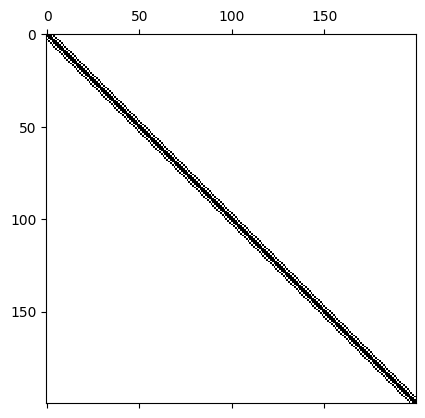

In [233]:
A.shape  # Controllo la dimensione della matrice e quindi se m = n
plt.spy(A)  # Controllo se è densa o sparsa
np.array_equal(A, A.T)  # Controllo che sia simmetrica
print(np.min(npl.eigvals(A)) > 0)  # Controllo che sia definita positiva

In [234]:
# Gauss Seidel
def gauss_seidel(A, b, x0, toll, it_max):
    errore = 1000

    D = np.diag(np.diag(A))
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    M = D + E
    N = -F
    T = np.dot(npl.inv(M), N)

    raggiospettrale = np.max(np.abs(npl.eigvals(T)))
    print("raggio spettrale Gauss-Seidel ", raggiospettrale)
    it = 0
    er_vet = []
    while it <= it_max and errore >= toll:
        x, flag = RisolviSis.Lsolve(M, b - np.dot(F, x0))
        errore = npl.norm(x - x0) / npl.norm(x)
        er_vet.append(errore)
        x0 = x.copy()
        it = it + 1
    return x, it, er_vet

In [235]:
# Gauss Seidel SOR
def gauss_seidel_sor(A, b, x0, toll, it_max, omega):
    errore = 1000

    D = np.diag(np.diag(A))
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    # Calcolo della matrice di iterazione di Gassu_Seidel SOR
    Momega = D + omega * E
    Nomega = (1 - omega) * D - omega * F
    T = np.dot(npl.inv(Momega), Nomega)

    raggiospettrale = np.max(np.abs(npl.eigvals(T)))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)

    M = D + E
    N = -F
    it = 0
    xold = x0.copy()
    xnew = x0.copy()
    er_vet = []
    while it <= it_max and errore >= toll:
        xtilde, flag = RisolviSis.Lsolve(M, b - np.dot(F, xold))
        xnew = (1 - omega) * xold + omega * xtilde
        errore = npl.norm(xnew - xold) / npl.norm(xnew)
        er_vet.append(errore)
        xold = xnew.copy()
        it = it + 1
    return xnew, it, er_vet

In [236]:
# Steepest Descent
def steepestdescent(A, b, x0, itmax, tol):
    # inizializzare le variabili necessarie
    x = x0
    r = np.dot(A, x) - b
    p = -r
    it = 0
    nb = npl.norm(b)
    errore = npl.norm(r) / nb
    vec_sol = []
    vec_sol.append(x)
    vet_r = []
    vet_r.append(errore)

    # utilizzare il metodo del gradiente per trovare la soluzione
    while it <= itmax and errore >= tol:
        it = it + 1
        Ap = A @ p
        rTr = r.T @ r
        alpha = rTr / np.dot(p.T, Ap)
        x = x + alpha * p
        vec_sol.append(x)
        r = r + alpha * Ap
        errore = npl.norm(r) / nb
        vet_r.append(errore)
        p = -r

    return x, vet_r, vec_sol, it

In [237]:
# Gradiente Coniugato
def conjugate_gradient(A, b, x0, itmax, tol):
    # inizializzare le variabili necessarie
    x = x0
    r = np.dot(A, x) - b
    p = -r
    it = 0
    nb = npl.norm(b)
    errore = npl.norm(r) / nb
    vec_sol = []
    vec_sol.append(x0)
    vet_r = []
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per trovare la soluzione
    while it < itmax and errore >= tol:
        it = it + 1
        Ap = A @ p
        rtr = r.T @ r
        alpha = rtr / np.dot(p.T, Ap)
        x = x + alpha * p
        vec_sol.append(x)
        r = r + alpha * Ap
        gamma = np.dot(r.T, r) / rtr
        errore = npl.norm(r) / nb
        vet_r.append(errore)
        p = -r + gamma * p

    return x, vet_r, vec_sol, it

In [238]:
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
toll = 1e-8
it_max = 100
x, it, er_vet = gauss_seidel(A, b, x0, toll, it_max)

raggio spettrale Gauss-Seidel  0.6323844622504119


In [239]:
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
toll = 1e-16
it_max = 1000
omega = 1.585
xnew, it, er_vet = gauss_seidel_sor(A, b, x0, toll, it_max, omega)

raggio spettrale Gauss-Seidel SOR  0.7021066008068587


In [240]:
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
tol = 1e-16
itmax = 1000
x, vet_r, vec_sol, it = steepestdescent(A, b, x0, itmax, tol)

In [241]:
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
tol = 1e-16
itmax = 1000
x,vet_r,vec_sol,it = conjugate_gradient(A, b, x0, itmax, tol)

In [242]:
#Usare il gradiente coniugato perché più efficiente

## Matrice 2

In [ ]:
dati = lm("Matrici test su cui esercitarsi-20230610/test11.mat")
A = dati["A"]
b = dati["b"]